<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/05_Unsupervised_Machine_Translation_Using_Monolingual_Corpora_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Translation Using Monolingual Corpora Only
### (International Conference on Learning Representations; ICLR)

### Before we start

### Adversarial Learning

1. Adversarial Attack 
    : 이미 훈련된 모델에 대해 입력 데이터를 조작해 잘못 예측하도록 함 

    - 방어책 
        1. Adversarial Training
            : 입력 데이터와 조작된 데이터 간의 구분을 위한 새로운 신경망을 학습시켜 모델이 임의로 조작된 데이터를 받지 않아도 이를 학습할 수 있는 방식 

        2. Defensive Distillation
            : 조작된 데이터까지 모델에 학습시키는 방식 


2. Auto Encoder 
    - 출력이 입력 데이터와 같아지도록 학습한 네트워크
    - 차원 축소, noise 제거, 이상 데이터 검출, pre-train 등에 활용

3. Back Translation 
    : paper(Improving nerual Machine Translation Model with Monolingual Data) 에서 기존 Machine Translation Model과 달리 monolingual Data로 학습이 가능한 방법을 제안
    1. Dummy Source Sentence
    : Encoder - dummy 값, Decoder - target sentence가 되도록 한 뒤 Encoder의 Parameter를 갱신되지 않도록 하며 학습
    2. Synthetic Source Sentence -> 두 번째 방법이 Back Translation
    : Encoder에 인공적으로 만든 source sentence를 넣어 학습 인공데이터 생성 과정 = Back transiation 


### Unsupervised Translation 

1. PARALLEL SENTENCE
    - 일반적으로 기계번역은 source sentence와 target sentence가 쌍을 이루는 parallel 데이터가 필요함.
    - 구하기도 힘들고 구축하는데 많은 비용이 들어감 

2. OTHER CORPUS
    - low resource 언어들은 parallel 데이터가 부족함.
    - 단일 언어로 이루어진 corpus는 있음.

3. ENGLISH CORPUS




### 논문 메인 컨셉 :  적은 parallel sentence로 학습을 하는것보다 단일 언어로 이루어진 많은 데이터를 학습하자!! 

##개요

- Naive한 unsupervised translation model M 

1. 문장을 drop, swap하여 noisse를 만듦
2. 데이터 셋에서 latent distribution을  align하기 위해 adversarial setting을 사용
3. Noise가 있는 문장을 encoder, decoder로 번역 
4. Reconstruct 와 translation을 측정하는 object function이 최소화되도록 학습 
5. 이렇게 학습된 encoder와 decoder를 다음 iteration에서 사용


- Denoising AutoEncoder
    1. AutoEncoder
        : Encoder와 Decoder로 구성이 되며, Encoder는 입력 데이터에 숨어 있는 중요한 특징을 압축된 형태로 추출을 해내고, 디코더는 그것을 다시 복원한다. 
        일반적으로 중요한 특징을 추출하는 hidden layer의 뉴론의 개수는 입력보다 작기 때문에 데이터를 압축 시키는 효과가 있음. 

    2. Denoising AutoEncoder
        :AutoEncoder에 잡음이 별로 없는 경우, 별다른 특징을 추출하는 것처럼 보이지 않는다. 하지만, 잡음의 비율이 높아지게 되면, 필터는 local한 특징보다는 점차 global한 특징을 추출하게 된다.
        그래서 기존 데이터에 노이즈를 일부러 더하고 다시 복원하는 방식을 사용함.

        

    
     

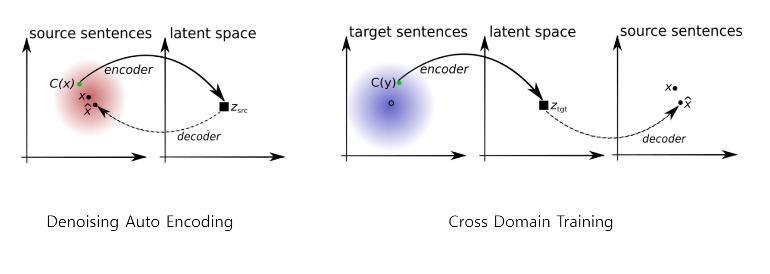

- Adversarial Training 
    - regularization의 한 방법
    - regularization은 overfitting을 막고 모델을 robust하게 만들어주기 위해 사용
    - 딥러닝 모델은 Input data를 학습하여 적절한 label을 반환하는 것을 목적으로 훈련을 진행함
    - Adversarial attack은 반대로 이미 훈련된 모델에 대하여 입력 데이터를 잘못 예측하도록 Input을 조작하는 것을 말함
    - Decoder에 encoder의 output과 비슷한 값을 input으로 줌 
    - Discriminator가 input문장이 데이터와 타겟 중 어디에 속하는지 예측
    - Encoder는 discriminator를 속이도록 학습


### Training Strategy 

- Parallel word dictionary를 활용한 Model의 번역이 input의 최소한의 정보를 담고 있다고 가정 
- Noisy한 input이지만 denoising auto encoder이기에 latent feature space에 잘 mapping 
- 이에 따라 decoder도 noiseless한 번역을 생성
- 같은 과정을 반복 



auto encoder 

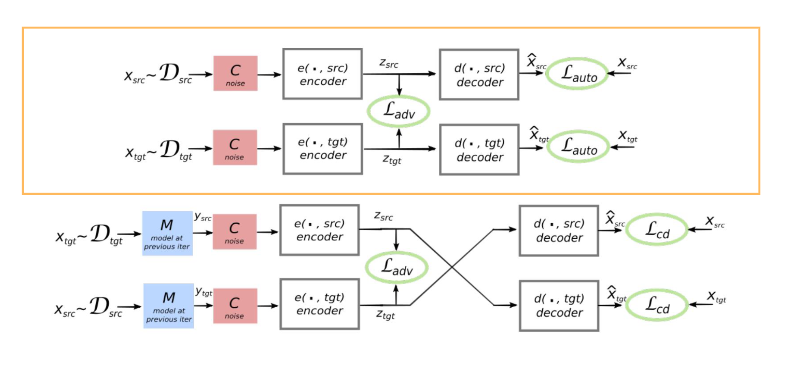

translation

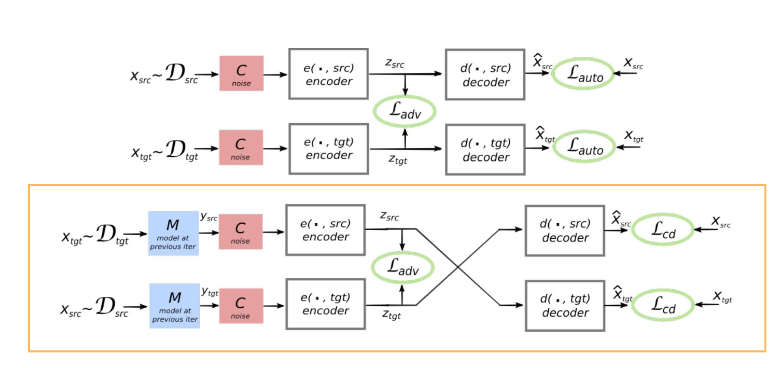

###criterion
    1. Parallel dataset이 아니기 때문에 번역의 품질 평가 어려움
    2. 따라서 input을 2step 번역을 통해 재구성하여 재구성한 문장과 input을 비교

참고 : https://www.youtube.com/watch?v=6-fU_89Nj0w